# SPARK

<p>Spark bilgisayar kümeleri üzerinde eşzamanlı işlem yapmamızı sağlayan büyük veri grupları için işlevsel kütüphaneleri bulunan,verileri in memory(diskden okuma yazma yapmadan tamamı hafızada olacak şekilde) olacak şekilde işleyen, scala dili ile geliştirilmiş açık kaynak kodlu bir freamwork ya da kütüphanedir.</p>
<p>Başka bir şekilde söylemek gerekirse spark disk'ten verikümelerini bilgisayar kümelerindeki hafızalara(ram) dagıtan  batch(toplu veri) yada streaming(akan veri) olarak da üzerinde paralel olarak sql,graph ve makine öğrenmesi işlemlerimizi yapabileceğimiz araçtır.</p>
<p>Sparkı daha iyi anlamak için öncelikle <em><strong>Lambda Architecture,Hadoop,HDFS,MapReduce</strong></em> gibi kavramlara bakalım.</p>
   

## <h><strong>1.Lambda architecture</strong></h>

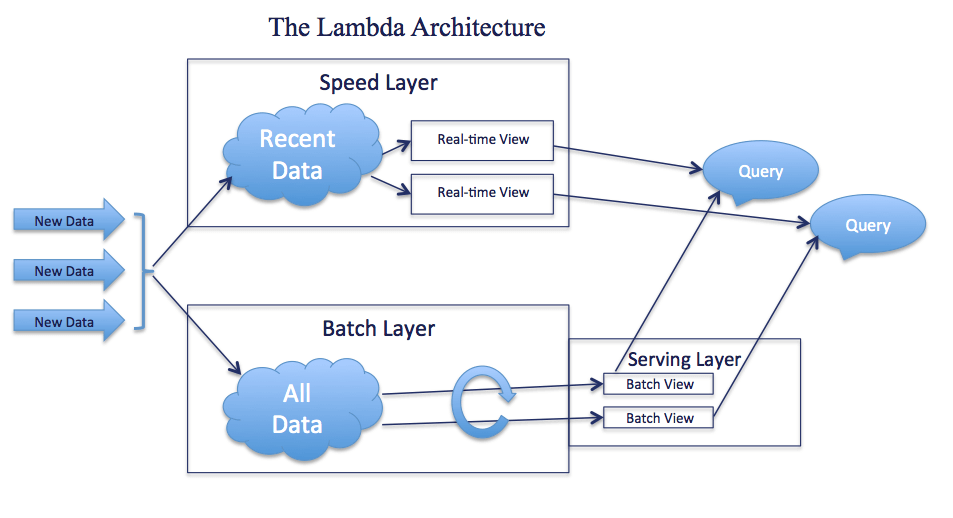

In [42]:
from IPython.display import Image
Image(filename="image/image2.png",width=720)

<p>Lamda mimarisi genel,ölçeklenebilir,hata tolaranslı veri işleme mimarisidir.Nathan Marz tarafından onun Twitter ve Backtype'daki büyük veri üzerindeki tecrübelerinden yola çıkarak geliştirilmiştir.</p>
<p>Bazen çok büyük veri setleri üzerinde istenilen sorgunun çalıştırması uzun süreceğinden aynı anda hem akan veri ve yığılan veri üzerinde işlem,raporlama vb gibi işler zor olcağından böyle bir mimiriye başvurulur.Öncelikle labmda mimarisinnde veri akışı için iki yol oluşturulur;Tüm verileri ham şekilde depolayan ve bu veriler üzerinde toplu işlemler gerçekleştiren <strong>Batch Layer(toplu iş katmanı )</strong>,batch katmanındaki yığılan veriler üzerinde sorgu atan yapıda <strong>Serving layer(Hizmet katmanı)</strong> sorhular ve  ve akan veriler üzerinde gerçek zamanlı analiz yapacak ve genelde yaklaşım yaparak doğruya en yakın sonucu en kısa sürede hesapmalası beklenen <strong>Speed Layer(hız katmanı)</strong> vardır</p>

### 1.1Batch Layer(Toplu iş katmanı)(apache Hadoop):

 <p>Toplu iş katmanıın(batch layer) temel görevi sürekli büyüyen kalıcı,ve değişmez verileri(hdfs) depolamak ve bu veri setlerinden geçici görünümler(view) oluşturmak(MapReduce).</p>Görünüm oluşturma işlemi sürekli olan bir işlemdir,yeni veriler geldiğinde bu veriler bir sonraki MapReduce işlemi sırasında oluşturulacak görünümlere toplanır.Görünümler tüm veri seti üzerinden yapılacağından görünümler sıklıkla güncellenemez kullanılan bilgisayar kümelerinin(cluster) ve veri setinin büyüklüğüne göre saatler sürebilir.<p>Toplu iş katmanına gelen veriler sabittir ve üzerine yazılamaz,değişkenler üzerindeki değişiklikler de bir olay(event) olarak algılanılıp zamanla etiketlenip tekrar olay kaydı olarak kaydedilir.</p><p>Apache hadoop kendi dosya sistemi Hdfs ve mapReduce işlemi ile bu katmanı gerçekler.</p>

### 2.1 Serving Layer(Hizmet katmanı)(Cloudera Impala)

Serving layer ise görünümleri indexler ve onlardan düşük gecikme sürelerinde sorgular dönderebilen görünümler elde eder yani şöyle ki hizmet katmanı toplu iş ve hız katmanındaki görünümleri dizinleyen ve verimli sorgulama için uygun hale getiren katmandır.<p>Bu katmanı gerçeklemek için Apaxhe Hbase,ElephantDB ve Cloudera Impala gibi teknelolojilerden faydalınılabilir,</p>

### 3.1 Speed Layer(Hız Katmanı)(Storm)

Speed layer hizmet katmanındaki yüksek gecikcemeleri dengeleyerek daha düşük dogruluk oranına sahip daha ancak daha çabuk sorgulanablen görünümmler oluşturur.Hız katmanı sadece güncel veriler üzerinden 

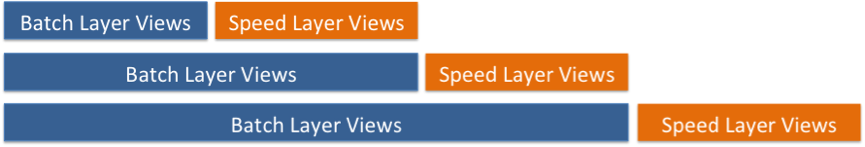

In [3]:
Image(filename="image/figure2.png",width=720)

ve gördüğünüz gibi batch layer ve speed layer view ile update edilebilir,ve gelen sorgularda iki view den birşeltirilerek cevaplanır.

## 2.Hadoop

Apache hadoop spark gibi büyük veri kümeleri ile birden fazla sunucu üzerinde paralel olarak işlem yapmamızı sağlayan açık kaynak kodlu kütüphanedir.

<p>Yani hadoop ile birden çok sunucu üzerinde dağıtılmış veri setleri tek bir veriseti gibi davranabilir ve  büyük bir sunucuya ihtiyaç duymadan büyük işlemleri paralel olarak gerçekleştriebilir.Hadoop'un kendi dosya dağıtım sitemi <strong>hdfs</strong>'dir(hadoop distirbuted file system'dir.).Veri setleri sunuculara hdsf ile dağıtıldıkdan sonra varsayılanı 3 kopya halinde raid tarzı dagıtıp yedekler ve bu veriler üzerinde hızlı analiz yapmamızı sağlayan model de <strong>MapReduce</strong>'dır</p>

### 2.1 HDFS 

HDFS sistemi usta/köle mimarisine sahiptir.HDFS sunucuları Dosya sistemini yöneten ve ve istemciler tarafından dosyalara ulaşımı düzenliyen teki bir NameNode' içerir.Ve genellikle her clustera bir Node düşecek şekilde DataNode'lar bulunur,bunlar çalıştıkları noda bağlı veri deposunu yönetir.Bir dosya birden fazla parçalara bölünerek bu :DataNode larda kopyalı halde saklanır her hangi bir node sunucusunun kaybedilmesi durumunda veri kaybını minimize etkemk için<p>Data node ların görevide istemcilerden gelen okuma ve yazma aynı zamanda NameNode dan gelen block oluşturma silme ve  işmeleridir.</p>

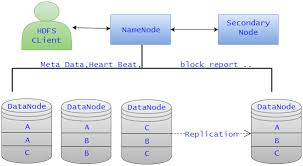

In [10]:
Image(filename="image/image3.png")

### 2.2 Map Reduce

Şimdi verilerimizi cluster'lara yani sunuculara dağıttık şimdi ise sıra paralel işlemeye geldi.Temeli fonksiyonel programlamada ki map ve reduce işlemlerinde dayanır.Aslında map ve reducu birbirinden habersiz iki farklı işlemdir.Önce veriler  sabit paraçalar bölünür her parça için bir map işlemi oluşturulur her parça üzerinde kullanıcı tanımlı bir map fonksiyonu çalıştırılır, Her parça için çalıştırılan map işemleri çıktıları geçici bir local diske yazar sonrasında bu parçalar reduce işleminin gerçekleştirleceği noda ağ üzerinden aktarılır yine kullanıcı tanımlı bir reduce işleminden sonra son çıktı elde edilir.

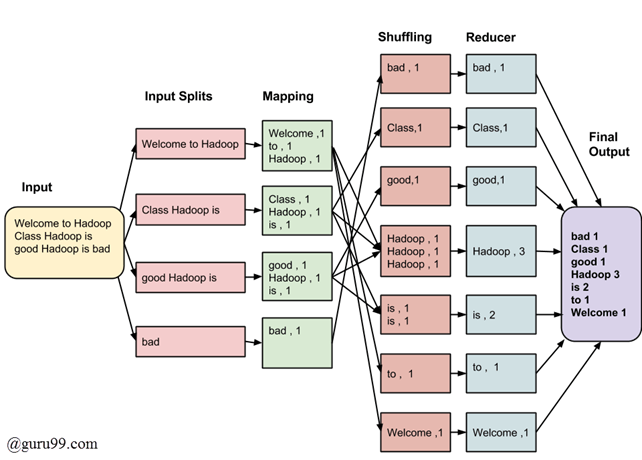

In [12]:
Image(filename="image/image4.png")

#### 2.3 Some Terms

<p><strong>Ambari</strong>:Apache hadoop kümelerini gözleyebilen,yönetebilen hadoop HDFS,MapReduce,Hive,Hcatalog,HBase,ZooKeeper,Ozzie,Pig,Sqoop desteği olan bir web tabanlı araçtır,Aynı zamanda Ambari bir clusterların HeatMaps(ısı haritaları)leri takip edebileceğimiz,Pig,Hive uygulamalarının performans özelliklerini gözlemleyebileceğimiz bir görsel tabloda sağlar. </p>
<p><strong>Cassandra</strong>:Java ile geliştirilmiş açık kaynak kodlu NoSQL veri tabanıdır.</p>
<p><strong>Hbase</strong>:yapılandırışlmış verileri büyük tablolarda destekleyen,ölçeklenebilir dağıtılmış veri tabanıdır.</p>
<p><strong>Hive</strong>:veri özetleme ve ad hoc sorgulama sağlayan bir büyük veri ambarı altyapısıdır</p>
<p><strong>Mahout</strong>:Ölçeklenebilir makine öğrenmesi ve veri madenciliği kütüphanesidir.</p>
<p><strong>Pig</strong>:Paralel hesaplamalar için yüksek düzeyde veri akış dili ve uygulama kütüphanesidir.</p>
<p><strong>ZooKeeper</strong>:Dağıtılmış sistemler için yüksek performanslı koordinasyon servisidir.</p>

Spark'a genel bir giriş yapmadan Big-Data camiasına ait terimlere karşı birazcık kulak dolgunluğumuz olduysa artık Spark'ı bilgisayarımza kurup bir kaç alıştırmayla devam edelim

<strong>Resources</strong>:
<ol>
<li>https://www.voltdb.com/blog/2014/12/01/simplifying-complex-lambda-architecture/</li>
<li>http://devveri.com/hadoop/mapreduce-nedir</li>
<li>https://www.capgemini.com/nl-nl/2016/03/big-data-architectures-from-lambda-architecture-to-streaming-etl/</li>
<li>https://github.com/databricks/spark-csv</li>
    <li></li>
</ol>

